### Práctica 
Complete los siguientes dos ejercicios escribiendo el código en Python. Deberá utilizar las 
bibliotecas networkx, matplotlib.pyplot y numpy. Responda a las preguntas de análisis basándose en las gráficas que 
genere. 

### Problema 1 
Uno de los descubrimientos más importantes sobre las redes aleatorias es que no se vuelven conectadas de forma 
gradual. En su lugar, experimentan una "transición de fase": por debajo de un umbral crítico de probabilidad de 
conexión p, la red está fragmentada en muchas islas pequeñas. Justo en ese umbral, un "componente gigante" 
emerge repentinamente. Su tarea es visualizar este fenómeno

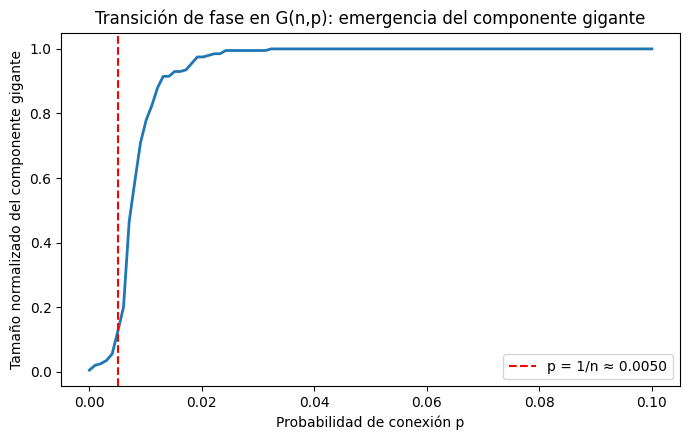

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 1) Parámetros
n = 200
ps = np.linspace(0.0, 0.1, 100)  # 100 valores de p entre 0 y 0.1

# 2) Simulación
giant_norm = []

for p in ps:
    G = nx.erdos_renyi_graph(n=n, p=p, seed=42)
    if G.number_of_nodes() == 0:
        giant_norm.append(0.0)
        continue
    comps = list(nx.connected_components(G))
    if len(comps) == 0:
        giant_norm.append(0.0)
        continue
    largest = max(comps, key=len)
    giant_norm.append(len(largest) / n)

# 3) Gráfica
plt.figure(figsize=(7, 4.5))
plt.plot(ps, giant_norm, linewidth=2)
plt.axvline(x=1.0/n, linestyle='--', color='red', label=f'p = 1/n ≈ {1.0/n:.4f}')

plt.xlabel('Probabilidad de conexión p')
plt.ylabel('Tamaño normalizado del componente gigante')
plt.title('Transición de fase en G(n,p): emergencia del componente gigante')
plt.legend()
plt.tight_layout()
plt.show()